In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [77]:
X = load_boston().data
Y = load_boston().target

In [78]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [79]:
clf = SGDRegressor()
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))


22.002611096122383


In [80]:
Y[0:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [81]:
clf.predict(X)[0:10]

array([30.11541469, 24.80979717, 30.33241595, 28.38883431, 27.73980678,
       25.04009414, 22.83449853, 19.40492534, 11.48135014, 18.7864729 ])

# implementation of SGD manually:

In [82]:
## loading the data 
data= pd.DataFrame(load_boston().data)
data.shape


(506, 13)

In [83]:
##initialize the X  and Y
X=data
Y=load_boston().target
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [84]:
## split the data in train and test data set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
### print shape of the train ans test dataset
print('x_train data  shape:  ',x_train.shape)
print('y_train data shape:  ',y_train.shape)

print('x_test data shape:  ',x_test.shape)
print('y_test data shape:   ',y_test.shape)

x_train data  shape:   (339, 13)
y_train data shape:   (339,)
x_test data shape:   (167, 13)
y_test data shape:    (167,)


In [85]:
#preprocessing
## apply StandardScaler to scale the x_train and x_test data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
## make datframe of standardized train and test data
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

# add last column  as target column in dataframe 
x_train['cost'] = np.array(y_train)
x_test['cost'] = np.array(y_test)

In [86]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,cost
0,0.911839,-0.502419,1.072305,-0.256978,1.633548,0.486034,0.962774,-0.823477,1.655334,1.552100,0.808078,-2.842959,1.523203,13.4
1,-0.411727,-0.502419,-1.129795,-0.256978,-0.552451,1.028078,0.668619,-0.183274,-0.871371,-0.802704,-0.304174,0.427436,-0.995240,23.6
2,0.124583,-0.502419,1.072305,-0.256978,1.441946,-3.913414,0.725324,-1.075955,1.655334,1.552100,0.808078,-0.053353,-0.765646,27.5
3,-0.406208,0.839388,-0.901940,-0.256978,-1.083710,0.097426,-0.515087,1.600509,-0.411970,-0.624310,-0.860301,0.152292,-0.184576,22.2
4,0.021742,-0.502419,1.072305,-0.256978,1.398401,0.123238,0.743044,-0.605107,1.655334,1.552100,0.808078,0.365116,0.301538,17.7


In [94]:
### initialization of the parameters
w = np.zeros(13) # initial weight 
n = 10000 # no of iterations
r = 0.01 # learning_rate
k= 40 # batch_size
b = 0 #consider zero_intercept intitially

In [95]:
for i in range(1,n):    
    batch = x_train.sample(k)    ## choose random k samples from x_train
    x_tmp = np.array(batch.drop('cost',axis=1))
    y_tmp = np.array(batch['cost'])
    w_temp = np.zeros(13)               ## intialize w_temp with 0
    b_temp = 0
    for j in range(1,k): 
        val1 = -2 * x_tmp[j] 
        val2 = y_tmp[j]
        #print(w.shape,x[z].shape)
        val3 = np.dot(w,x_tmp[j])
        val5 = (val2 - val3)
        val4 = (val1 * val5)
        w_temp= w_temp + val4
        b_temp = (-2)*( val2 - ( val3 + b ) )   
        
    w-=(r*w_temp/k)
    b-=(r*b_temp/k)

In [96]:
## print w and b
print('W of the implemented model is:  ',w)
print('b intercept  of the implemented model  is: ',b)

W of the implemented model is:   [-1.40249144  0.82610736 -0.75205572 -0.09542387 -1.76483671  2.76173337
  0.17792795 -2.47815113  3.29377206 -2.52745313 -1.96668914  1.13982008
 -3.3257751 ]
b intercept  of the implemented model  is:  22.38434562063488


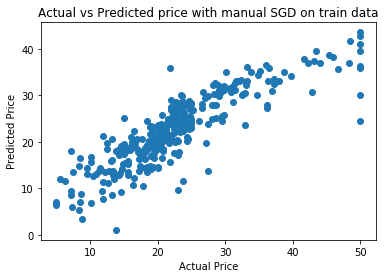

Mean Squared Error:  19.7516997059925


In [97]:
###### Plot prediction on  on Train-Data ######
y__actual = x_train['cost']
y__pred = x_train.drop('cost',axis=1).dot(w.T) + b


plt.scatter(y_actual,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted price with manual SGD on train data')
plt.show()

train_loss_manual = mean_squared_error(y_actual, y_pred)

print("Mean Squared Error: ",train_loss_manual)

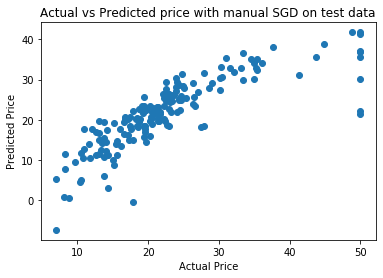

Mean Squared Error:  31.520946914475672


In [98]:
###### Plot on Test-Data ######
y_actual = x_test['cost']
y_pred =x_test.drop('cost',axis=1).dot(w.T) + b


plt.scatter(y_actual,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted price with manual SGD on test data')

plt.show()

test_loss_manual = mean_squared_error(y_actual, y_pred)
print("Mean Squared Error: ",test_loss_manual)

In [100]:
Y_train = np.array(y_train)
Y_test = np.array(y_test)
X_train = x_train.drop('cost',axis=1)
X_test= x_test.drop('cost',axis=1)

sgd = SGDRegressor(learning_rate='constant', eta0=0.01, n_iter_no_change=10000)
sgd.fit(X_train, Y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=10000, penalty='l2', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

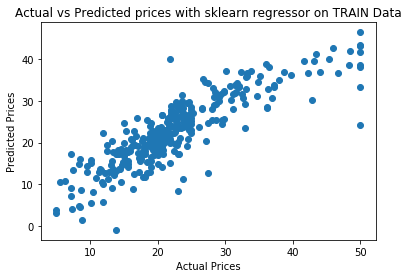

Mean Squared Error:  20.981205122194478


In [101]:
y_actual = Y_train
y_pred = sgd.predict(X_train)


plt.scatter(y_actual,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted prices with sklearn regressor on TRAIN Data')
plt.show()

train_loss_sklearn = mean_squared_error(y_actual, y_pred)

print("Mean Squared Error: ",train_loss_sklearn)

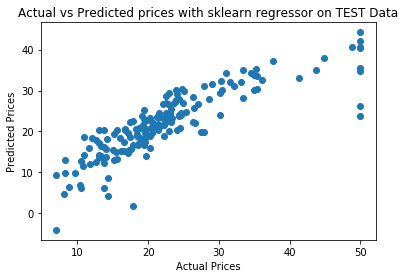

Mean Squared Error:  25.604723876550317


In [102]:
y_actual = Y_test
y_pred = clf.predict(X_test)


plt.scatter(y_actual,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted prices with sklearn regressor on TEST Data')
plt.show()

test_loss_sklearn = mean_squared_error(y_actual, y_pred)

print("Mean Squared Error: ",test_loss_sklearn)

In [103]:
sk_intercept = clf.intercept_[0]
print("sklearn Intercept:  \n\n",sk_intercept)

sklearn Intercept:  

 22.531274217756902


In [104]:
sk_weight = clf.coef_
print("sklearn weight:  \n\n", sk_weight)

sklearn weight:  

 [-0.84814632  0.98566697 -0.05538153  0.70848266 -1.93283664  2.68144183
 -0.00689792 -3.08696866  2.10369167 -1.39201532 -2.00587491  0.83195298
 -3.68118666]


In [106]:
from prettytable import PrettyTable
table= PrettyTable()

table.field_names = ["parameter", " manually implemented SGD regressor ", " sklearn's SGD regressor"]

table.add_row(['training  MSE error',train_loss_manual,train_loss_sklearn])
table.add_row(['test MSE error',test_loss_manual,test_loss_sklearn])
table.add_row(['b intercept',b,sgd.intercept_])
print(table)

+---------------------+--------------------------------------+--------------------------+
|      parameter      |  manually implemented SGD regressor  |  sklearn's SGD regressor |
+---------------------+--------------------------------------+--------------------------+
| training  MSE error |           19.7516997059925           |    20.981205122194478    |
|    test MSE error   |          31.520946914475672          |    25.604723876550317    |
|     b intercept     |          22.38434562063488           |       [22.7555584]       |
+---------------------+--------------------------------------+--------------------------+
